Step 1: Data Preparation

First 5 rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3

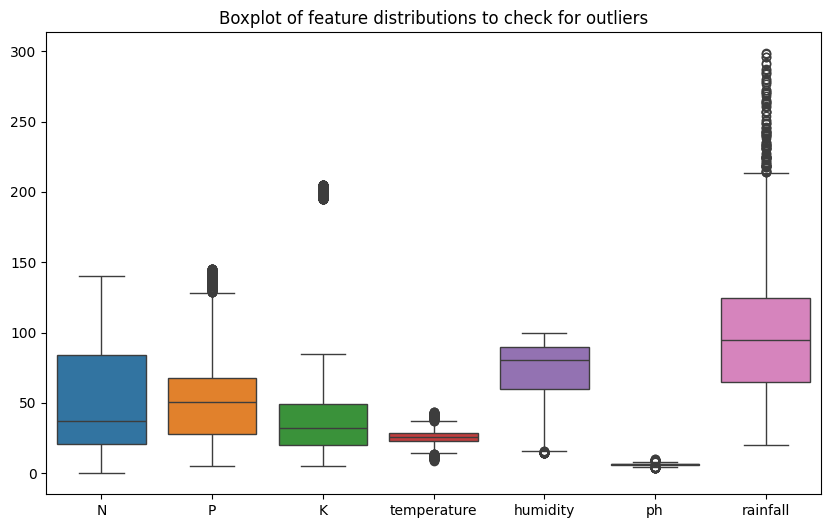


Data after handling outliers:
                 N            P            K  temperature     humidity  \
count  1846.000000  1846.000000  1846.000000  1846.000000  1846.000000   
mean     54.210184    45.161430    32.745937    25.711188    69.770583   
std      37.928591    22.506246    16.614550     4.155121    22.649324   
min       0.000000     5.000000     5.000000    15.330426    14.258040   
25%      22.000000    25.000000    20.000000    23.267408    57.749008   
50%      40.000000    46.000000    28.000000    25.839646    77.331406   
75%      89.000000    63.000000    45.000000    28.518889    88.288685   
max     140.000000    95.000000    85.000000    36.750875    99.981876   

                ph     rainfall  
count  1846.000000  1846.000000  
mean      6.493357   101.474427  
std       0.680293    52.432682  
min       4.603563    20.211267  
25%       6.033501    61.144916  
50%       6.470301    94.279811  
75%       6.944110   130.387488  
max       8.399136   248.85929

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
# Replace with the correct path to your dataset
file_path = "crop_recommendation.csv"
df = pd.read_csv('/content/Crop_recommendation.csv')

# Step 3: Data Exploration
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

# Step 4: Handle missing values (if any)
# If missing values exist, handle them (e.g., impute with mean/median or drop rows/columns)
# Example (if any column had missing values):
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Step 5: Visualize the data distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude the target column ('label')
plt.title("Boxplot of feature distributions to check for outliers")
plt.show()

# Step 6: Handle outliers (optional, if necessary)
# Example: Remove outliers using the interquartile range (IQR)
for column in df.columns[:-1]:  # Exclude the target column ('label')
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print("\nData after handling outliers:")
print(df.describe())

# Step 7: Encode the target variable
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Step 8: Split data into features and target
X = df.drop('label', axis=1)
y = df['label']

# Step 9: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 10: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nShape of Training Data:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)

print("\nShape of Testing Data:")
print("X_test:", X_test.shape, "y_test:", y_test.shape)


Random Forest Apply

Random Forest Accuracy: 99.19%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        20
           6       0.77      1.00      0.87        10
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        14
          16       1.00   

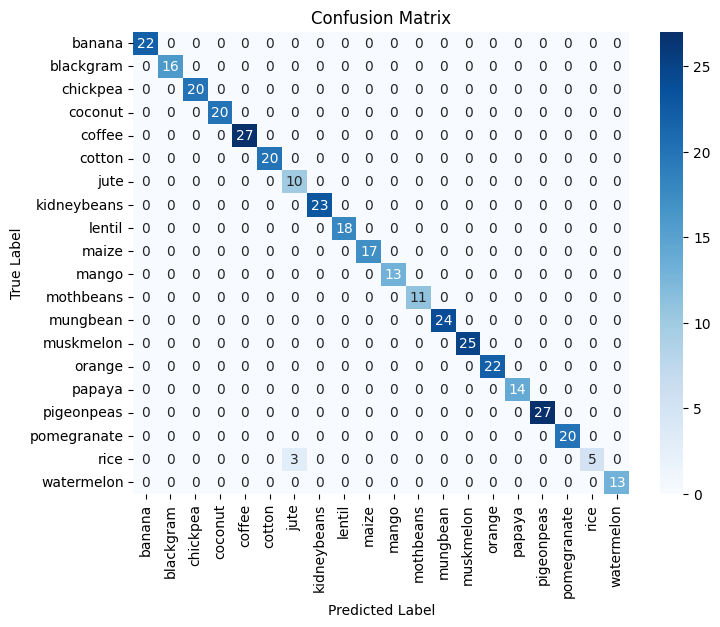

In [ ]:
# Step 1: Import necessary libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")

# Step 5: Display additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Step 6: Visualize the Confusion Matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
pip install pandas scikit-learn


**XGBOOST**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

# Preprocessing
# Assuming 'label' is the target variable and other columns are features
X = df.drop('label', axis=1)
y = df['label']

# Encode the labels (convert string labels to integers)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model training using XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_encoded = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Get prediction probabilities (confidence levels)
y_prob = xgb_model.predict_proba(X_test)

# Function to calculate and display the first and second best crops with their confidence levels
def display_best_crops(sample_index):
    # Get the confidence for each class (probabilities)
    class_probabilities = y_prob[sample_index]

    # Sort classes based on confidence scores
    sorted_classes = np.argsort(class_probabilities)[::-1]  # Descending order

    # First best crop
    first_best_crop = label_encoder.inverse_transform([sorted_classes[0]])[0]
    first_best_confidence = class_probabilities[sorted_classes[0]] * 100  # Confidence in %

    # Remove the first best crop from the dataset for second best evaluation
    remaining_classes = sorted_classes[1:]  # All except the first best
    mask = y_train != sorted_classes[0]  # Exclude the first best crop

    # Retrain model for second best prediction
    second_best_X_train = X_train[mask]
    second_best_y_train = y_train[mask]

    # Re-encode the labels for the remaining classes
    second_best_encoder = LabelEncoder()
    second_best_y_train_encoded = second_best_encoder.fit_transform(second_best_y_train)

    # Fit the model for second best prediction
    second_best_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    second_best_model.fit(second_best_X_train, second_best_y_train_encoded)

    # Predict second best confidence for this sample
    second_best_prob = second_best_model.predict_proba(X_test.iloc[sample_index:sample_index + 1, :])
    second_best_sorted = np.argsort(second_best_prob[0])[::-1]  # Descending order

    # Decode second best crop and confidence
    second_best_crop = second_best_encoder.inverse_transform([second_best_sorted[0]])[0]
    second_best_crop_original = label_encoder.inverse_transform([second_best_crop])[0]
    second_best_confidence = second_best_prob[0][second_best_sorted[0]] * 100  # Confidence in %

    # Print the results
    print(f"Sample {sample_index+1}:")
    print(f"Predicted Crop: {first_best_crop}")
    print(f"1st Best Crop: {first_best_crop} | Confidence: {first_best_confidence:.2f}%")
    print(f"2nd Best Crop: {second_best_crop_original} | Confidence: {second_best_confidence:.2f}%\n")

# Display for the first 5 samples
for i in range(100):
    display_best_crops(i)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_encoded)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Sample 1:
Predicted Crop: muskmelon
1st Best Crop: muskmelon | Confidence: 99.51%
2nd Best Crop: watermelon | Confidence: 96.53%

Sample 2:
Predicted Crop: watermelon
1st Best Crop: watermelon | Confidence: 99.63%
2nd Best Crop: mungbean | Confidence: 25.75%

Sample 3:
Predicted Crop: papaya
1st Best Crop: papaya | Confidence: 99.73%
2nd Best Crop: blackgram | Confidence: 32.56%

Sample 4:
Predicted Crop: papaya
1st Best Crop: papaya | Confidence: 99.73%
2nd Best Crop: blackgram | Confidence: 21.39%

Sample 5:
Predicted Crop: apple
1st Best Crop: apple | Confidence: 99.52%
2nd Best Crop: grapes | Confidence: 52.59%

Sample 6:
Predicted Crop: mango
1st Best Crop: mango | Confidence: 99.69%
2nd Best Crop: pigeonpeas | Confidence: 86.59%

Sample 7:
Predicted Crop: apple
1st Best Crop: apple | Confidence: 99.50%
2nd Best Crop: papaya | Confidence: 58.56%

Sample 8:
Predicted Crop: mothbeans
1st Best Crop: mothbeans | Confidence: 99.85%
2nd Best Crop: mungbean | Confidence: 17.19%

Sample 9

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

# Preprocessing
X = df.drop('label', axis=1)
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model training using XGBoost
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_encoded = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Get prediction probabilities
y_prob = xgb_model.predict_proba(X_test)

# Prepare a list to store results
results = []

# Function to calculate best and second-best crops with confidence
def get_best_crops(sample_index):
    class_probabilities = y_prob[sample_index]
    sorted_classes = np.argsort(class_probabilities)[::-1]  # Descending order

    first_best_crop = label_encoder.inverse_transform([sorted_classes[0]])[0]
    first_best_confidence = class_probabilities[sorted_classes[0]] * 100

    remaining_classes = sorted_classes[1:]
    mask = y_train != sorted_classes[0]

    second_best_X_train = X_train[mask]
    second_best_y_train = y_train[mask]

    second_best_encoder = LabelEncoder()
    second_best_y_train_encoded = second_best_encoder.fit_transform(second_best_y_train)

    second_best_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    second_best_model.fit(second_best_X_train, second_best_y_train_encoded)

    second_best_prob = second_best_model.predict_proba(X_test.iloc[sample_index:sample_index + 1, :])
    second_best_sorted = np.argsort(second_best_prob[0])[::-1]

    second_best_crop = second_best_encoder.inverse_transform([second_best_sorted[0]])[0]
    second_best_crop_original = label_encoder.inverse_transform([second_best_crop])[0]
    second_best_confidence = second_best_prob[0][second_best_sorted[0]] * 100

    # Append results to the list
    results.append({
        "Sample": sample_index + 1,
        "Predicted Crop": first_best_crop,
        "1st Best Crop": first_best_crop,
        "1st Best Confidence": f"{first_best_confidence:.2f}%",
        "2nd Best Crop": second_best_crop_original,
        "2nd Best Confidence": f"{second_best_confidence:.2f}%"
    })

# Get predictions for the first 100 samples
for i in range(100):
    get_best_crops(i)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv('crop_predictions.csv', index=False)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_encoded)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Results saved to 'crop_predictions.csv'")


Model Accuracy: 98.64%
Results saved to 'crop_predictions.csv'


Use of LogisticRegression (Confidence level is not acceptable as most of the predictions are below 70%)

---



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

def create_balanced_crop_recommendation_table(file_path):
    # ডেটা লোড করা
    data = pd.read_csv(file_path)

    # ফিচার এবং টার্গেট আলাদা করা
    X = data.drop('label', axis=1)
    y = data['label']

    # স্কেলিং করা
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # লেবেল এনকোডিং
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # মডেল তৈরি ও ট্রেনিং (Logistic Regression ব্যবহার করে)
    lr_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000, random_state=42)
    lr_model.fit(X_scaled, y_encoded)

    # প্রতিটি ডেটা পয়েন্টের জন্য প্রেডিকশন প্রোবাবিলিটি
    probabilities = lr_model.predict_proba(X_scaled)

    # রেজাল্ট স্টোর করার লিস্ট
    results = []

    # প্রতিটি ডেটা পয়েন্টের জন্য টপ ২ ফসল বের করা
    for i, probs in enumerate(probabilities):
        top_2_idx = np.argsort(probs)[-2:][::-1]
        prob_diff = abs(probs[top_2_idx[0]] - probs[top_2_idx[1]])

        # ৫০-৫০ বা ৬০-৪০ এর কাছাকাছি থাকলে প্রাধান্য বেশি
        if prob_diff <= 0.2:
            crop1 = le.inverse_transform([top_2_idx[0]])[0]
            conf1 = probs[top_2_idx[0]] * 100

            crop2 = le.inverse_transform([top_2_idx[1]])[0]
            conf2 = probs[top_2_idx[1]] * 100

            # মূল ডেটার সাথে রেজাল্ট যোগ করা
            result_row = {
                'N': data.iloc[i]['N'],
                'P': data.iloc[i]['P'],
                'K': data.iloc[i]['K'],
                'temperature': data.iloc[i]['temperature'],
                'humidity': data.iloc[i]['humidity'],
                'ph': data.iloc[i]['ph'],
                'rainfall': data.iloc[i]['rainfall'],
                'real': data.iloc[i]['label'],
                '1st_recommend': crop1,
                'Probability_1': f"{conf1:.2f}%",
                '2nd_recommend': crop2,
                'Probability_2': f"{conf2:.2f}%",
            }
            results.append(result_row)

    # রেজাল্ট ডেটাফ্রেমে রূপান্তর
    result_df = pd.DataFrame(results)

    return result_df

# ফাংশন ব্যবহার করে টেবিল তৈরি
file_path = '/content/Crop_recommendation.csv'  # আপনার ফাইল পাথ
df_results = create_balanced_crop_recommendation_table(file_path)

# পুরো টেবিল দেখানো
print("\nপ্রথম কয়েকটি রো:")
print(df_results.head())

# CSV ফাইলে সেভ করা
df_results.to_csv('balanced_crop_recommendations.csv', index=False)
print("\nফলাফল 'balanced_crop_recommendations.csv' ফাইলে সেভ করা হয়েছে")

# কিছু স্ট্যাটিসটিক্স দেখানো
print("\nস্ট্যাটিসটিক্স:")
print(f"মোট রো সংখ্যা: {len(df_results)}")
print("\nসবচেয়ে বেশি পরামর্শ দেওয়া ফসল (প্রথম পছন্দ):")
print(df_results['1st_recommend'].value_counts().head())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



প্রথম কয়েকটি রো:
    N   P   K  temperature   humidity        ph    rainfall  real  \
0  94  50  37    25.665852  80.663850  6.948020  209.586971  rice   
1  91  35  39    23.793920  80.418180  6.970860  206.261186  rice   
2  95  55  42    26.795339  82.148087  5.950661  193.347399  rice   
3  91  35  38    24.897282  80.525861  6.134287  183.679321  rice   
4  74  54  38    25.655535  83.470211  7.120273  217.378858  rice   

  1st_recommend Probability_1 2nd_recommend Probability_2  
0          rice        52.11%          jute        44.41%  
1          rice        56.71%          jute        37.37%  
2          jute        47.18%          rice        42.75%  
3          jute        49.58%          rice        40.30%  
4          rice        49.99%          jute        43.83%  

ফলাফল 'balanced_crop_recommendations.csv' ফাইলে সেভ করা হয়েছে

স্ট্যাটিসটিক্স:
মোট রো সংখ্যা: 73

সবচেয়ে বেশি পরামর্শ দেওয়া ফসল (প্রথম পছন্দ):
1st_recommend
jute          14
rice           9
lentil     

Random Forest Classifier with less accuracy


In [10]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


CatBoostClassifier

In [11]:
!pip install catboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (use the appropriate file path)
data = pd.read_csv('/content/Crop_recommendation.csv')

# Feature matrix and target variable (crop label)
X = data.drop(columns=['label'])  # All columns except 'label' are features
y = data['label']  # 'label' column is the target (crop)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train CatBoost model to predict primary crop (Label1)
catboost_primary = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, random_state=42, silent=True)
catboost_primary.fit(X_train, y_train)
y_pred_primary = catboost_primary.predict(X_test)

# Get prediction probabilities for primary crop
y_prob_primary = catboost_primary.predict_proba(X_test)

# Recommend the best 2 crops for each sample
def recommend_top_2_crops(sample_index):
    # Get the predicted class for this sample
    predicted_class = y_pred_primary[sample_index]

    # Get the confidence for each class (probabilities)
    class_probabilities = y_prob_primary[sample_index]

    # Sort the classes based on confidence
    sorted_classes = np.argsort(class_probabilities)[::-1]  # Sort in descending order
    first_best_crop = catboost_primary.classes_[sorted_classes[0]]
    first_best_confidence = class_probabilities[sorted_classes[0]] * 100  # Multiply by 100 for percentage

    second_best_crop = catboost_primary.classes_[sorted_classes[1]]
    second_best_confidence = class_probabilities[sorted_classes[1]] * 100  # Multiply by 100 for percentage

    # Print the top 2 crop recommendations
    print(f"Sample {sample_index+1}:")
    print(f"Predicted Primary Crop: {first_best_crop} | Confidence: {first_best_confidence:.2f}%")
    print(f"2nd Best Crop: {second_best_crop} | Confidence: {second_best_confidence:.2f}%\n")

# Display recommendations for the first 5 samples
for i in range(5):
    recommend_top_2_crops(i)

# Calculate the accuracy for the primary crop (Label1)
accuracy_primary = accuracy_score(y_test, y_pred_primary) * 100
print(f"Primary Crop Recommendation Accuracy: {accuracy_primary:.2f}%")


Sample 1:
Predicted Primary Crop: muskmelon | Confidence: 99.85%
2nd Best Crop: watermelon | Confidence: 0.10%

Sample 2:
Predicted Primary Crop: watermelon | Confidence: 99.72%
2nd Best Crop: muskmelon | Confidence: 0.22%

Sample 3:
Predicted Primary Crop: papaya | Confidence: 99.93%
2nd Best Crop: apple | Confidence: 0.02%

Sample 4:
Predicted Primary Crop: papaya | Confidence: 99.90%
2nd Best Crop: apple | Confidence: 0.04%

Sample 5:
Predicted Primary Crop: apple | Confidence: 99.88%
2nd Best Crop: papaya | Confidence: 0.04%

Primary Crop Recommendation Accuracy: 98.86%
